#  Amazon Fine Food Reviews Analysis- KNN
-- This is my 3rd Assignment on Amazon Fine Food Dataset



***Objective***
    
 * We have to find best appropriate Optimal 'k' (k-NN) by using these technique :
   
   1. Bag of words,
   2. tf-idf,
   3. Avg w2v,
   4. tf-idf w2v 
   
  * Alogoritms- KD Tree and Brute Force
  
  * Train and Test Split- 70-30 ratio
  
  * use cross-validation- 10 folds
  
  * Lastly, need to find Accuracy among them.
  
  



## Imports, Exploratory Data Analysis & Pre processing

In [0]:
# ============================== loading libraries ===========================================
#IMPORT LIBRARIES

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import pickle
import pdb
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#loading from drive
filtered_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reviews.csv')
#filtered_data=pd.read_csv('Reviews.csv')#displaying
filtered_data.head()

print(filtered_data.shape) #looking at the number of attributes and size of the data
filtered_data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#For setting positive/negative 
def partition(x):
    if x < 3:
        return 0
    return 1
#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
#pdb.set_trace()
positiveNegative = actualScore.map(partition) 
#pdb.set_trace()
filtered_data['Score'] = positiveNegative
#print(filtered_data.head())#print 5 row 
print(filtered_data.shape) #looking at the number of attributes and size of the data
filtered_data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

Sorting as we want according to time series

In [6]:
###Sorting as we want according to time series
n_samples = 100000
df_sample = sorted_data.sample(n_samples)

df_sample.sort_values('Time',inplace=True)
df_sample.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
374421,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,1,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...
230347,230348,B00004RYGX,A1048CYU0OV4O8,Judy L. Eans,2,2,1,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...
374449,374450,B00004CI84,ACJR7EQF9S6FP,Jeremy Robertson,2,3,1,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...
230375,230376,B00004RYGX,ACJR7EQF9S6FP,Jeremy Robertson,2,3,1,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...
230333,230334,B00004RYGX,A1GB1Q193DNFGR,Bruce Lee Pullen,5,5,1,970531200,Fabulous Comedic Fanasy Directed by a Master,Beetlejuice is an awe-inspiring wonderfully am...


De-duplication of entries

In [7]:
#De-duplication of entries
final=df_sample.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)

print(final.shape)#shape
print((final['Id'].size*1.0)/(df_sample['Id'].size*1.0)*100)#percentage

#get to know how much posive negative there in table
final['Score'].value_counts()

(87575, 10)
87.575


1    74837
0    12738
Name: Score, dtype: int64

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')#choosen the english language

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer,SnowballStemmer

stop = set(stopwords.words('english')) #set of stopwords
porter = PorterStemmer()
snowball = SnowballStemmer('english')
#Text Preprocessing: Stemming, stop-word removal and Lemmatization
# find sentences containing HTML tags
import re#regular expression

i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
1
What happens when you say his name three times? Michael Keaten stars in this comedy about two couples that live in an old two story house.  While coming back from a supply store, the couple suddenly get caught inside of a  &quot;broken-up&quot; bridge and then just before they start to tumble down  into the lake, a board catches them.  But just when they've got their hopes  up, and small dog steps on the board and the car starts to slide off the  bridge and into the lake waters.  A few minutes later...<p>They find  themselves back into their home, they find that somehow somehad light the  fireplace, as if done by magic.  From then on, they find a weird-looking  dead guy known as Bettlejuice.  The only way they can get him for help is  to call him by his name three times and he will appear at their survice.  But they soon wish that they have never called his name, because  Be

In [0]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''

final_40000 = final.head(40000)#taking 2000 datapoints

def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

    str1=[];

for sent in final_40000['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    sent=cleanpunc(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(snowball.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final_40000['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final_40000['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    #str1 =b" ".join(filtered_sentence) #final string of cleaned words
    str1 =b' '.join(filtered_sentence).decode()
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [10]:
#adding a column of CleanedText which displays the data after pre-processing of the review 
final_40000['clean_text']=final_string
print(final_40000.shape)

(40000, 11)


In [0]:
def plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc):
  plt.figure()
  #plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(n_neighbors, list_train_auc, color='g', label='Train')
  plt.plot(n_neighbors, list_cv_auc, color='r', label='CV')
  
  plt.scatter(n_neighbors, list_train_auc, label='Train AUC points')
  plt.scatter(n_neighbors, list_cv_auc, label='CV AUC points')
  
  plt.legend()
  plt.xlabel("K:hyperparameter")
  plt.ylabel("AUC")
  plt.title("PLOT")
  plt.show()

## Applying KNN brute force


### Applying KNN brute force on BOW

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#final_40000 = final_40000.head(2000)#taking 20000 datapoints due to low RAM
#X_train, X_test, y_train, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)

#i have split data in three part train ,cv and test.

X_train_m, X_test, y_train_m, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train_m.shape)
print(y_test.shape)
print("-----------")
print(X_cv.shape)
print(X_train.shape)
print(y_cv.shape)
print(y_train.shape)


(22400,)
(12000,)
(28000,)
(12000,)
-----------
(5600,)
(22400,)
(5600,)
(22400,)


In [0]:
#Text -> Uni gram Vectors

uni_gram = CountVectorizer(min_df=10, max_features=5000)
X_train = uni_gram.fit_transform(X_train)

#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)

#Normalize Data
X_cv = uni_gram.transform(X_cv)
X_cv = preprocessing.normalize(X_cv)
print("CV Data Size: ",X_cv.shape)

#Normalize Data
X_test = uni_gram.transform(X_test)
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (22400, 4203)
CV Data Size:  (5600, 4203)
Test Data Size:  (12000, 4203)


In [0]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)
for train, cv in tscv.split(X_train):

    # print("%s %s" % (train, cv))
    print(X_train[train].shape, X_train[cv].shape)

(2040, 4203) (2036, 4203)
(4076, 4203) (2036, 4203)
(6112, 4203) (2036, 4203)
(8148, 4203) (2036, 4203)
(10184, 4203) (2036, 4203)
(12220, 4203) (2036, 4203)
(14256, 4203) (2036, 4203)
(16292, 4203) (2036, 4203)
(18328, 4203) (2036, 4203)
(20364, 4203) (2036, 4203)


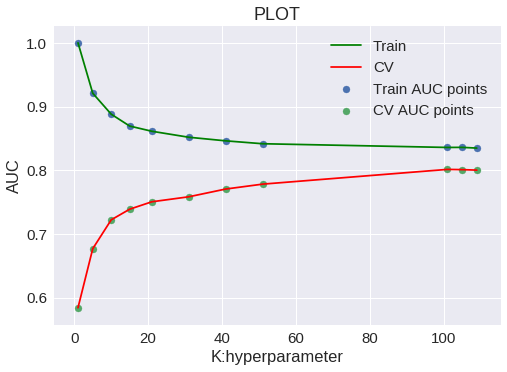

CPU times: user 5min 25s, sys: 2.47 s, total: 5min 28s
Wall time: 5min 28s


In [0]:
%%time
# Algorithm='brute'
from sklearn.neighbors import KNeighborsClassifier
list_train_auc = []
list_cv_auc = []
n_neighbors=[1, 5, 10, 15, 21, 31, 41, 51, 101, 105, 109]

for i in n_neighbors:
  
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  
  train_predicted = clf.predict_proba(X_train)[:, 1]
  list_train_auc.append(roc_auc_score(y_train, train_predicted))#train

  cv_predicted = clf.predict_proba(X_cv)[:, 1]
  list_cv_auc.append(roc_auc_score(y_cv, cv_predicted))#cv
  
  
plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc)



Accuracy on test set: 85.350%
Precision_score on test set: 85.340%
Recall_score on test set: 100.000%
F1_score on test set: 92.090%


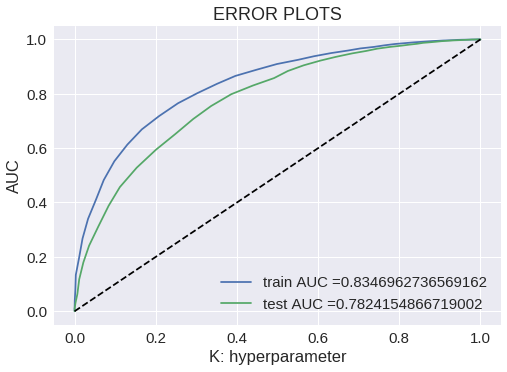

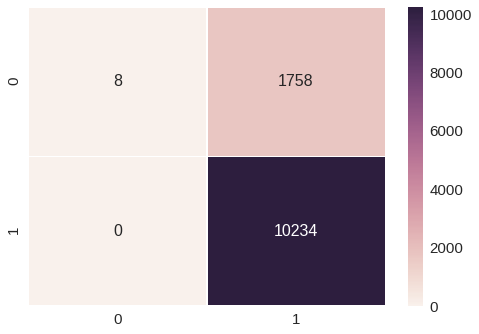

In [0]:
#Testing Accuracy on Test data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=51)#k =105 i have obtained from above
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))


train_predicted = clf.predict_proba(X_train)[:, 1]
test_predicted = clf.predict_proba(X_test)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predicted)

#ploting
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.legend(loc='best')
plt.show()


df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)

### Applying KNN brute force on TFIDF

In [0]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

#Breaking into Train and test
#X_train, X_test, y_train, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)

X_train_m, X_test, y_train_m, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=10) #Using bi-grams

X_train=tfidf.fit_transform(X_train)
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)

#Normalize Data
X_cv = tfidf.transform(X_cv)
X_cv = preprocessing.normalize(X_cv)
print("CV Data Size: ",X_cv.shape)

#Normalize Data
X_test = tfidf.transform(X_test)
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (22400, 13003)
CV Data Size:  (5600, 13003)
Test Data Size:  (12000, 13003)
CPU times: user 5.55 s, sys: 165 ms, total: 5.71 s
Wall time: 5.71 s


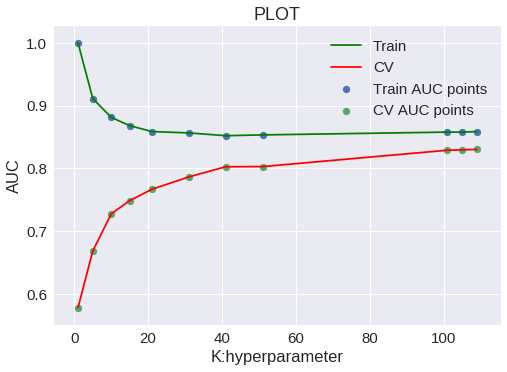

CPU times: user 5min 21s, sys: 2.44 s, total: 5min 24s
Wall time: 5min 24s


In [0]:
%%time
# Algorithm='brute'
from sklearn.neighbors import KNeighborsClassifier
list_train_auc = []
list_cv_auc = []
n_neighbors=[1, 5, 10, 15, 21, 31, 41, 51, 101, 105, 109]

for i in n_neighbors:
  
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  
  train_predicted = clf.predict_proba(X_train)[:, 1]
  list_train_auc.append(roc_auc_score(y_train, train_predicted))#train

  cv_predicted = clf.predict_proba(X_cv)[:, 1]
  list_cv_auc.append(roc_auc_score(y_cv, cv_predicted))#cv
  
  
plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc)



Accuracy on test set: 85.617%
Precision_score on test set: 85.610%
Recall_score on test set: 99.932%
F1_score on test set: 92.218%


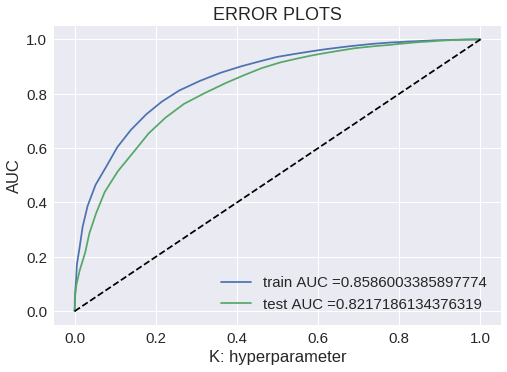

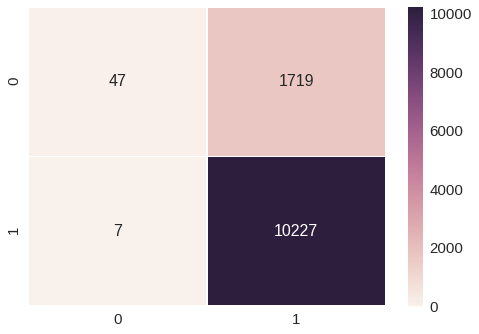

In [0]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='brute',n_neighbors=41)#pridicted k
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))


train_predicted = clf.predict_proba(X_train)[:, 1]
test_predicted = clf.predict_proba(X_test)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predicted)

#ploting
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.legend(loc='best')
plt.show()


df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)

###  Applying KNN brute force on AVG W2V

In [0]:
#Breaking into Train and test
#X_train, X_test, y_train, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)

X_train_m, X_test, y_train_m, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

In [0]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in X_train:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [0]:
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [0]:
#list_of_sent=[]
#for sent in train['CleanedText'].values:
#list_of_sent.append(sent.split())

#w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
#w2v_words = list(w2v_model.wv.vocab)

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

22400
50


In [0]:
final_40000=final_40000.head(22400)

In [0]:
%%time
#X_train, X_test, y_train, y_test = train_test_split(sent_vectors,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_train_m, X_test, y_train_m, y_test = train_test_split(sent_vectors,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)

X_cv = preprocessing.normalize(X_cv)
print("CV Data Size: ",X_cv.shape)

X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (12544, 50)
CV Data Size:  (3136, 50)
Test Data Size:  (6720, 50)
CPU times: user 39.7 ms, sys: 1.01 ms, total: 40.7 ms
Wall time: 40.2 ms


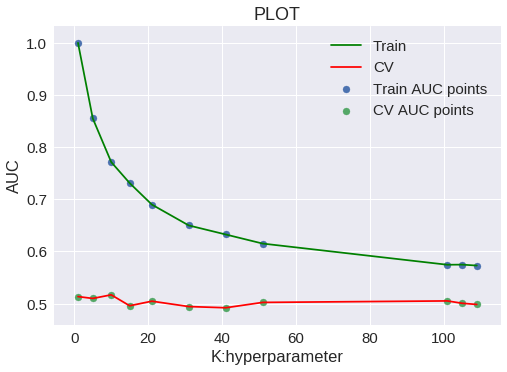

CPU times: user 3min 54s, sys: 252 ms, total: 3min 55s
Wall time: 3min 55s


In [0]:
%%time
# Algorithm='brute'
from sklearn.neighbors import KNeighborsClassifier
list_train_auc = []
list_cv_auc = []
n_neighbors=[1, 5, 10, 15, 21, 31, 41, 51, 101, 105, 109]

for i in n_neighbors:
  
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  
  train_predicted = clf.predict_proba(X_train)[:, 1]
  list_train_auc.append(roc_auc_score(y_train, train_predicted))#train

  cv_predicted = clf.predict_proba(X_cv)[:, 1]
  list_cv_auc.append(roc_auc_score(y_cv, cv_predicted))#cv
  
  
plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc)



Accuracy on test set: 87.961%
Precision_score on test set: 87.961%
Recall_score on test set: 100.000%
F1_score on test set: 93.595%


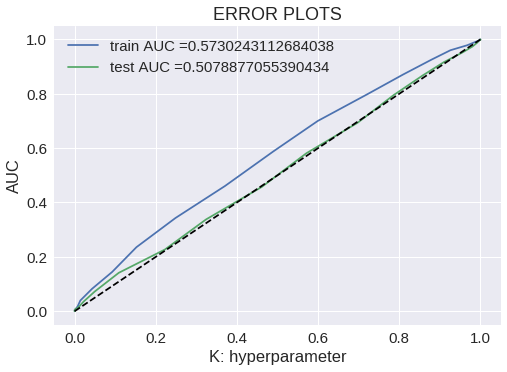

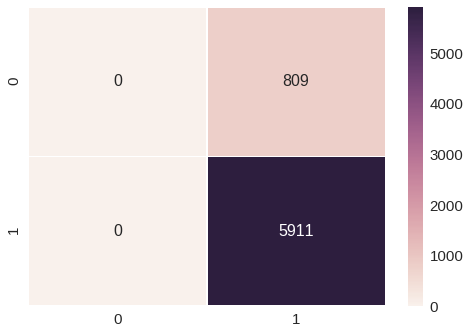

In [0]:
#Testing Accuracy on Test data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=101)
knn.fit(X_train,y_train)#AvgWord2Vec

y_pred = knn.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))

train_predicted = clf.predict_proba(X_train)[:, 1]
test_predicted = clf.predict_proba(X_test)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predicted)

#ploting
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.legend(loc='best')
plt.show()


df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)

### Applying KNN brute force on TFIDF W2V

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values,test_size=0.3,shuffle=False)
X_train_m, X_test, y_train_m, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

tfidf = TfidfVectorizer(ngram_range=(1,1))
X_train= tfidf.fit_transform(X_train)
X_train =preprocessing.normalize(X_train)

X_cv = tfidf.transform(X_cv)
X_cv = preprocessing.normalize(X_cv)

X_test = tfidf.transform(X_test)
X_test = preprocessing.normalize(X_test)

In [0]:
print(len(list_of_sent))
print(X_train.shape)

22400
(22400, 18368)


In [0]:
%%time
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf.get_feature_names() # tfidf words/col-names
# tfidf_feat is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
b=False
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    #print(sent)
    for word in sent: # for each word in a review/sentence
        #print(word)
        try:
            vec = w2v_model.wv[word]# obtain the tf_idfidf of a word in a sentence/review
            #print(vec)
            tf_idf = X_train[row, tfidf_feat.index(word)]
            #print(tf_idf)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
            #print("original words",weight_sum)
            b=True
        except:
            b=False
            #print("exception words",weight_sum)
            pass
    if(weight_sum!=0 and b==True):
      #print("words",weight_sum)
      sent_vec /= weight_sum
      tfidf_sent_vectors.append(sent_vec)
      
    row += 1
    
print(len(tfidf_sent_vectors))
#print(len(tfidf_sent_vectors[0]))
#print(tfidf_sent_vectors)

15329
CPU times: user 3min 28s, sys: 99 ms, total: 3min 28s
Wall time: 3min 28s


In [0]:
print(tfidf_sent_vectors[0])

[ 2.12921553 -0.55555954  0.25679968  0.11505331  1.36239915 -0.69031966
 -0.67433504 -0.96951514 -0.53274592 -1.19369878 -0.60711682 -1.11676651
 -0.89924498  1.59813427  0.93940908  0.87844782  0.19720687 -1.73598834
  1.31359589 -0.72468756  0.15102245  1.08662131 -0.98761966 -0.49147325
 -1.0118326  -1.27158457  0.07476127  0.51232487  1.2153617   0.68044662
  1.52448302  0.26367689  0.69902048 -0.19803456  0.94249902  1.30493867
 -1.07514714 -0.17466351 -1.68667709  0.20609673 -0.17850488  0.50383088
  0.04563147  0.25308517 -1.63503194  0.14561977 -0.19491828  0.103864
 -1.5130112  -0.26522636]


In [0]:
np.argwhere(np.isnan(tfidf_sent_vectors))#checking Nan issue

array([], shape=(0, 2), dtype=int64)

In [0]:
final_40000=final_40000.head(15329)#changing size acc to x_train list size obtained

In [0]:
#Not shuffling the data as we want it on time basis
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(tfidf_sent_vectors,final_40000['Score'].values,test_size=0.3,shuffle=False)

X_train_m, X_test, y_train_m, y_test = train_test_split(tfidf_sent_vectors,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )


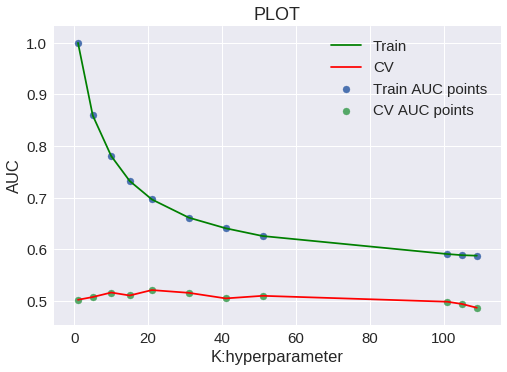

CPU times: user 1min 10s, sys: 303 ms, total: 1min 10s
Wall time: 1min 10s


In [0]:
%%time
# Algorithm='brute'
from sklearn.neighbors import KNeighborsClassifier
list_train_auc = []
list_cv_auc = []
n_neighbors=[1, 5, 10, 15, 21, 31, 41, 51, 101, 105, 109]

for i in n_neighbors:
  
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  
  train_predicted = clf.predict_proba(X_train)[:, 1]
  list_train_auc.append(roc_auc_score(y_train, train_predicted))#train

  cv_predicted = clf.predict_proba(X_cv)[:, 1]
  list_cv_auc.append(roc_auc_score(y_cv, cv_predicted))#cv
  
  
plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc)



Accuracy on test set: 87.736%
Precision_score on test set: 87.736%
Recall_score on test set: 100.000%
F1_score on test set: 93.468%


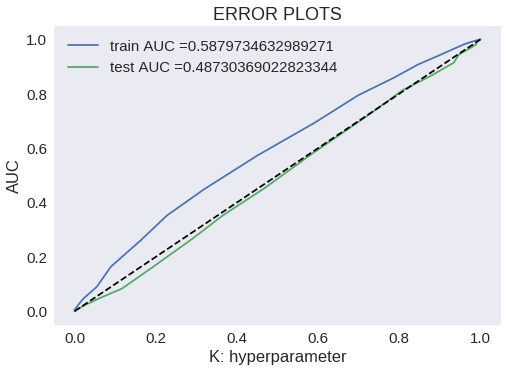

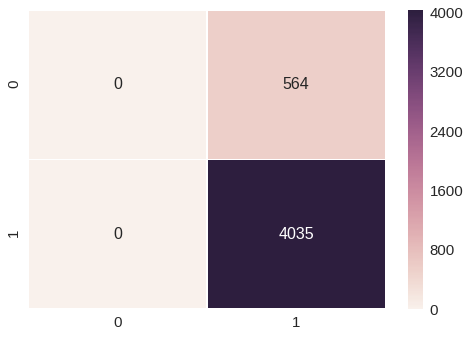

In [0]:
#Testing Accuracy on Test data
knn = KNeighborsClassifier(n_neighbors=101)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))


train_predicted = clf.predict_proba(X_train)[:, 1]
test_predicted = clf.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predicted)

#ploting
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.legend(loc='best')
plt.grid()
plt.show()

#heatmap
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)

##  Applying KNN kd-tree

### Applying KNN kd-tree on BOW

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

final_40000 = final_40000.head(20000)#taking 20000 datapoints due to low RAM And after confirmation from your side then i have used.

#X_train, X_test, y_train, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_train_m, X_test, y_train_m, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

In [0]:
#Text -> Uni gram Vectors
uni_gram = CountVectorizer(min_df=10, max_features=500)
X_train = uni_gram.fit_transform(X_train)

#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)

#Normalize Data
X_cv = uni_gram.transform(X_cv)
X_cv = preprocessing.normalize(X_cv)
print("Test Data Size: ",X_cv.shape)

#Normalize Data
X_test = uni_gram.transform(X_test)
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (11200, 500)
Test Data Size:  (2800, 500)
Test Data Size:  (6000, 500)


In [0]:
#convertion to dense array
print("the type of count vectorizer X_train ",type(X_train))
print("the type of count vectorizer X_cv ",type(X_cv))
print("the type of count vectorizer X_test ",type(X_test))
X_train=X_train.toarray()
X_cv=X_cv.toarray()
X_test=X_test.toarray()
print("the type of count vectorizer X_train ",type(X_train))
print("the type of count vectorizer X_cv ",type(X_cv))
print("the type of count vectorizer X_test ",type(X_test))

the type of count vectorizer X_train  <class 'scipy.sparse.csr.csr_matrix'>
the type of count vectorizer X_cv  <class 'scipy.sparse.csr.csr_matrix'>
the type of count vectorizer X_test  <class 'scipy.sparse.csr.csr_matrix'>
the type of count vectorizer X_train  <class 'numpy.ndarray'>
the type of count vectorizer X_cv  <class 'numpy.ndarray'>
the type of count vectorizer X_test  <class 'numpy.ndarray'>


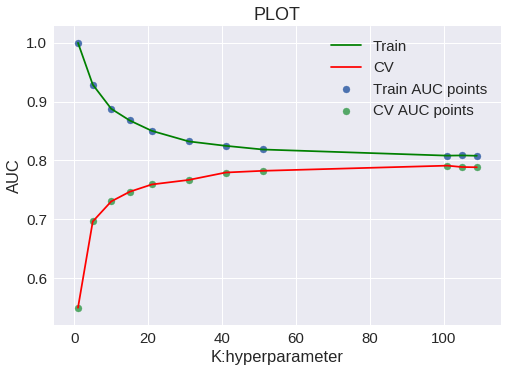

CPU times: user 34min 59s, sys: 549 ms, total: 35min
Wall time: 35min


In [0]:
%%time
# Algorithm='kd_tree'
from sklearn.neighbors import KNeighborsClassifier
list_train_auc = []
list_cv_auc = []
n_neighbors=[1, 5, 10, 15, 21, 31, 41, 51, 101, 105, 109]

for i in n_neighbors:
  
  clf = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
  clf.fit(X_train,y_train)
  
  train_predicted = clf.predict_proba(X_train)[:, 1]
  list_train_auc.append(roc_auc_score(y_train, train_predicted))#train

  cv_predicted = clf.predict_proba(X_cv)[:, 1]
  list_cv_auc.append(roc_auc_score(y_cv, cv_predicted))#cv
  
  
plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc)


Accuracy on test set: 87.783%
Precision_score on test set: 87.798%
Recall_score on test set: 99.981%
F1_score on test set: 93.494%


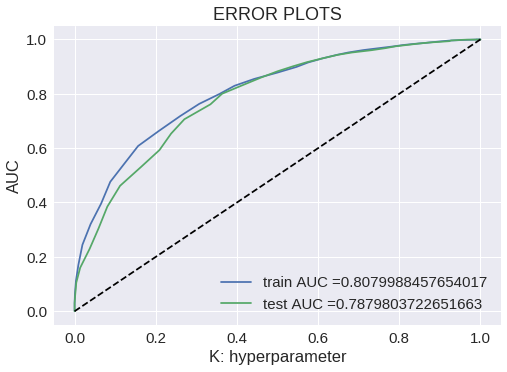

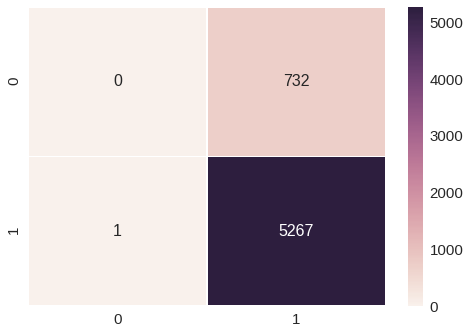

In [0]:
#Testing Accuracy on Test data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=51)#k i have obtained from above
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))


train_predicted = clf.predict_proba(X_train)[:, 1]
test_predicted = clf.predict_proba(X_test)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predicted)

#ploting
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.legend(loc='best')
plt.show()



df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)


### Applying KNN kd-tree on TFIDF

In [0]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

#Breaking into Train and test
#X_train, X_test, y_train, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_train_m, X_test, y_train_m, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=10, max_features=5000) #Using bi-grams

X_train=tfidf.fit_transform(X_train)
X_train = preprocessing.normalize(X_train)
#print("Train Data Size: ",X_train.shape)

X_cv=tfidf.transform(X_cv)
X_cv = preprocessing.normalize(X_cv)
#print("Train Data Size: ",X_cv.shape)

#Normalize Data
X_test = tfidf.transform(X_test)
X_test = preprocessing.normalize(X_test)
#print("Test Data Size: ",X_test.shape)

In [0]:
#convert Sparse matrics to dense matrics
X_train=X_train.toarray()
X_cv=X_cv.toarray()
X_test=X_test.toarray()

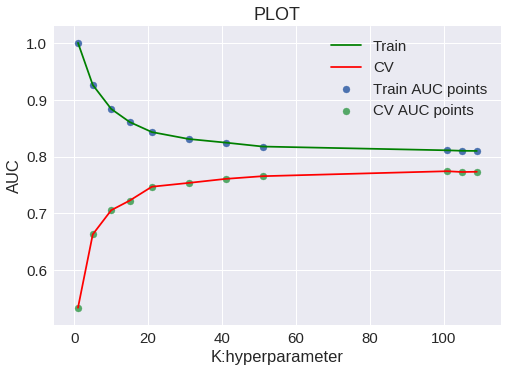

CPU times: user 34min 7s, sys: 492 ms, total: 34min 8s
Wall time: 34min 8s


In [0]:
%%time
# Algorithm='kd_tree'
from sklearn.neighbors import KNeighborsClassifier
list_train_auc = []
list_cv_auc = []
n_neighbors=[1, 5, 10, 15, 21, 31, 41, 51, 101, 105, 109]

for i in n_neighbors:
  
  clf = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
  clf.fit(X_train,y_train)
  
  train_predicted = clf.predict_proba(X_train)[:, 1]
  list_train_auc.append(roc_auc_score(y_train, train_predicted))#train

  cv_predicted = clf.predict_proba(X_cv)[:, 1]
  list_cv_auc.append(roc_auc_score(y_cv, cv_predicted))#cv
  
  
plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc)


Accuracy on test set: 87.800%
Precision_score on test set: 87.800%
Recall_score on test set: 100.000%
F1_score on test set: 93.504%


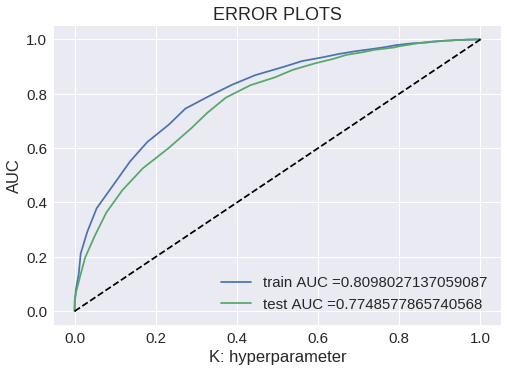

CPU times: user 5min 24s, sys: 236 ms, total: 5min 24s
Wall time: 5min 24s


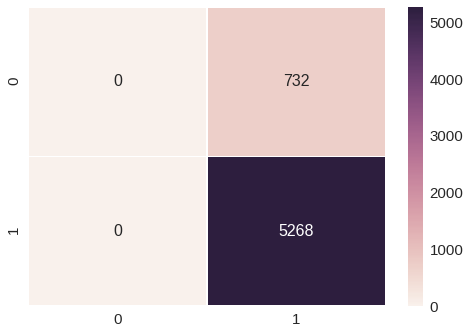

In [0]:
%%time
#Testing Accuracy on Test data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=51)#k  i have obtained from above
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))


train_predicted = clf.predict_proba(X_train)[:, 1]
test_predicted = clf.predict_proba(X_test)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predicted)

#ploting
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.legend(loc='best')
plt.show()



df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)


### Applying KNN kd-tree on AVG W2V

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
final_40000 = final_40000.head(20000)#taking 20000 datapoints due to low RAM
#Breaking into Train and test
#X_train, X_test, y_train, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_train_m, X_test, y_train_m, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

In [0]:
# Train your own Word2Vec model using your own text corpus
import gensim
#i=0
#list_of_sent=[]
#for sent in X_train:
#    filtered_sentence=[]
#    sent=cleanhtml(sent)
#    for w in sent.split():
#        for cleaned_words in cleanpunc(w).split():
#            if(cleaned_words.isalpha()):    
#                filtered_sentence.append(cleaned_words.lower())
#            else:
#                continue 
#    list_of_sent.append(filtered_sentence)

In [0]:
list_of_sent=[]
for sent in X_train:
  list_of_sent.append(sent.split())

w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [16]:
# min_count = 5 considers only words that occured atleast 5 times
#w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
print(len(w2v_words))

4530


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

14000
50


In [0]:
final_40000=final_40000.head(14000)

In [0]:
%%time
#from sklearn.feature_extraction.text import TfidfVectorizer

#X_train, X_test, y_train, y_test = train_test_split(sent_vectors,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_train_m, X_test, y_train_m, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)

X_cv = preprocessing.normalize(X_cv)
print("Test Data Size: ",X_cv.shape)

X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (9800, 50)
Test Data Size:  (4200, 50)
CPU times: user 25.7 ms, sys: 2 ms, total: 27.7 ms
Wall time: 27.8 ms


In [0]:
#convert Sparse matrics to dense matrics
#X_train=X_train.toarray()
#X_test=X_test.toarray()
#convertion to dense array
print("the type of count vectorizer ",type(X_train))
print("the type of count vectorizer ",type(X_test))


the type of count vectorizer  <class 'numpy.ndarray'>
the type of count vectorizer  <class 'numpy.ndarray'>


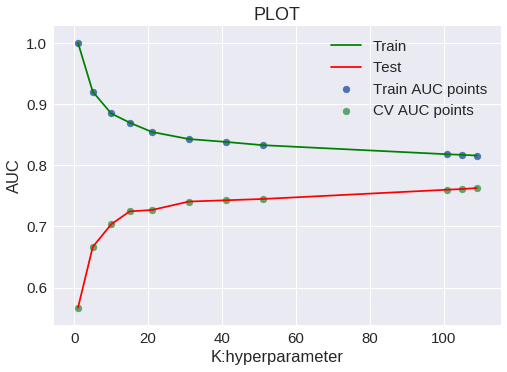

CPU times: user 2min 16s, sys: 170 ms, total: 2min 16s
Wall time: 2min 16s


In [0]:
%%time
# Algorithm='kd_tree'
from sklearn.neighbors import KNeighborsClassifier
list_train_auc = []
list_cv_auc = []
n_neighbors=[1, 5, 10, 15, 21, 31, 41, 51, 101, 105, 109]

for i in n_neighbors:
  
  clf = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
  clf.fit(X_train,y_train)
  
  train_predicted = clf.predict_proba(X_train)[:, 1]
  list_train_auc.append(roc_auc_score(y_train, train_predicted))#train

  cv_predicted = clf.predict_proba(X_cv)[:, 1]
  list_cv_auc.append(roc_auc_score(y_cv, cv_predicted))#cv
  
  
plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc)


Accuracy on test set: 88.952%
Precision_score on test set: 88.952%
Recall_score on test set: 100.000%
F1_score on test set: 94.153%


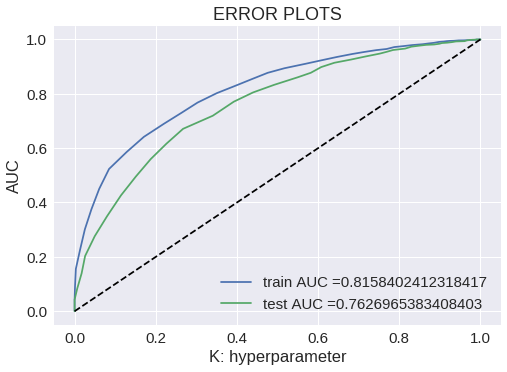

CPU times: user 19.7 s, sys: 197 ms, total: 19.9 s
Wall time: 19.7 s


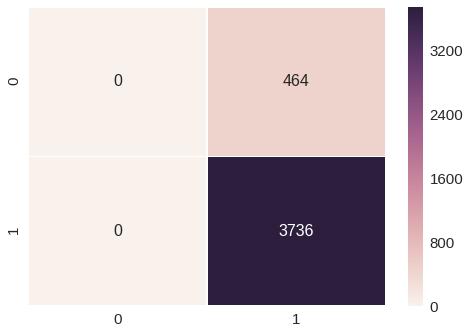

In [0]:
%%time
#Testing Accuracy on Test data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=101)#k  i have obtained from above
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))


train_predicted = clf.predict_proba(X_train)[:, 1]
test_predicted = clf.predict_proba(X_test)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predicted)

#ploting
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.legend(loc='best')
plt.show()



df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)


### Applying KNN kd-tree on TFIDF W2V

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(final_40000['clean_text'].values,final_40000['Score'].values,test_size=0.3,shuffle=False)

tfidf = TfidfVectorizer(ngram_range=(1,1))
X_train= tfidf.fit_transform(X_train)
X_train =preprocessing.normalize(X_train)

X_cv = tfidf.transform(X_cv)
X_cv = preprocessing.normalize(X_cv)

X_test = tfidf.transform(X_test)
X_test = preprocessing.normalize(X_test)

In [18]:
%%time
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf.get_feature_names() # tfidf words/col-names
# tfidf_feat is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
b=False
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    #print(sent)
    for word in sent: # for each word in a review/sentence
        #print(word)
        try:
            vec = w2v_model.wv[word]# obtain the tf_idfidf of a word in a sentence/review
            #print(vec)
            tf_idf = X_train[row, tfidf_feat.index(word)]
            #print(tf_idf)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
            #print("original words",weight_sum)
            b=True
        except:
            b=False
            #print("exception words",weight_sum)
            pass
    if(weight_sum!=0 and b==True):
      #print("words",weight_sum)
      sent_vec /= weight_sum
      tfidf_sent_vectors.append(sent_vec)
      
    row += 1
    
print(len(tfidf_sent_vectors))
#print(len(tfidf_sent_vectors[0]))
#print(tfidf_sent_vectors)

10701
CPU times: user 1min 9s, sys: 33.7 ms, total: 1min 9s
Wall time: 1min 9s


In [19]:
print(tfidf_sent_vectors[0])

[ 0.40299122  0.62959754  0.62036712 -0.18723168  0.44552863  0.07874391
  0.39953534 -0.22585192  0.22729953  0.10713633 -0.30544617 -0.73545602
  0.39133148  0.09705555  0.12906129 -0.72530414  0.44084883  0.13939002
 -0.0656387   0.2577328  -0.04020839 -1.00304097  0.35586268 -0.66701062
 -0.02506931 -0.20922035  0.36776318  0.03289987  0.32939905  0.1438994
 -0.85054065 -0.57199946 -0.38021758 -0.24009043 -0.96170419  0.6325161
 -1.1485678  -0.01207073 -0.2396362  -0.57950201  0.05774636  1.14207767
 -0.1155386  -0.54195232 -0.1338278   0.30659176  0.5402428   0.68207188
  0.08787788 -0.66138631]


In [20]:
np.argwhere(np.isnan(tfidf_sent_vectors))#checking Nan issue

array([], shape=(0, 2), dtype=int64)

In [0]:
final_40000=final_40000.head(10701)

In [0]:
#Not shuffling the data as we want it on time basis
#X_train, X_test, y_train, y_test = train_test_split(tfidf_sent_vectors,final_40000['Score'].values,test_size=0.3,shuffle=False)
X_train_m, X_test, y_train_m, y_test = train_test_split(tfidf_sent_vectors,final_40000['Score'].values ,test_size=0.30,shuffle=False)
X_cv, X_train, y_cv, y_train= train_test_split(X_train_m, y_train_m, test_size=0.8,shuffle=False )

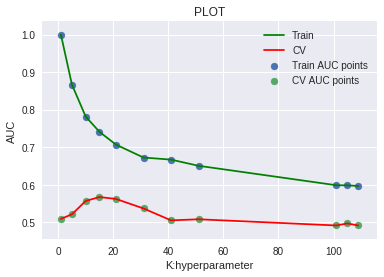

CPU times: user 33.9 s, sys: 180 ms, total: 34.1 s
Wall time: 33.9 s


In [32]:
%%time
# Algorithm='kd_tree'
from sklearn.neighbors import KNeighborsClassifier
list_train_auc = []
list_cv_auc = []
n_neighbors=[1, 5, 10, 15, 21, 31, 41, 51, 101, 105, 109]

for i in n_neighbors:
  
  clf = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
  clf.fit(X_train,y_train)
  
  train_predicted = clf.predict_proba(X_train)[:, 1]
  list_train_auc.append(roc_auc_score(y_train, train_predicted))#train

  cv_predicted = clf.predict_proba(X_cv)[:, 1]
  list_cv_auc.append(roc_auc_score(y_cv, cv_predicted))#cv
  
  
plotAUCCurve(n_neighbors,list_train_auc,list_cv_auc)


Accuracy on test set: 89.567%
Precision_score on test set: 89.567%
Recall_score on test set: 100.000%
F1_score on test set: 94.496%


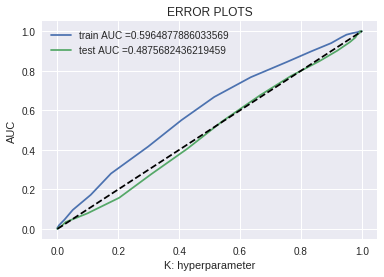

CPU times: user 6.97 s, sys: 229 ms, total: 7.2 s
Wall time: 6.96 s


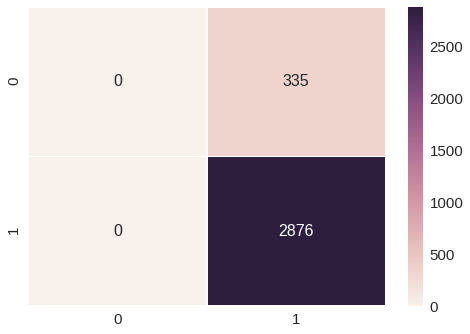

In [33]:
%%time
#Testing Accuracy on Test data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=101)#k  i have obtained from above
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision_score on test set: %0.3f%%"%(precision_score(y_test, y_pred)*100))
print("Recall_score on test set: %0.3f%%"%(recall_score(y_test, y_pred)*100))
print("F1_score on test set: %0.3f%%"%(f1_score(y_test, y_pred)*100))


train_predicted = clf.predict_proba(X_train)[:, 1]
test_predicted = clf.predict_proba(X_test)[:, 1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predicted)

#ploting
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.legend(loc='best')
plt.show()



df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.set(font_scale=1.5)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',linewidths=.5)


## Conclusions

|Featurization  | n_neighbors |Accuracy Score| Precision Score|Re-call Score| F1-Score|
| ----------------------|------|-------------------------|--------------------------|---------|----------|--------------|
|KNN Brute-BOW| 51 |85.350%     |     85.340%  | 100.00% |92.090%|
|KNN Brute-TFIDF| 41|85.617%     |    85.610%  | 99.932% |92.218%|
|KNN Brute-W2V-TFIDF| 101|87.961%     |    87.961%  |100.00% |93.595%|
|KNN Brute-AVG TFIDF| 101|87.736%     |    87.736%  | 100.00% |93.468%|
|*** | *** | *** | *** | ***
|KNN Kd-tree-BOW|   51|87.783%     |     87.798%  |99.981% |93.494%|
|KNN Kd-tree-TFIDF|   51|87.800%     |    87.800%  | 100.00% |93.504%|
|KNN Kd-tree-W2V-TFIDF|  101|88.952%     |    88.952%  | 100.00% |94.153%|
|KNN Kd-tree-AVG TFIDF|  101| 89.567%     |     89.567%  | 100.00% |94.496%|

In [0]:
                                                ---xxx---